In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# To check null value
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [7]:
dataset = dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'})

In [8]:
dataset

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
dataset.describe()

,CustomerID,Age,Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# So mean age of the customer is = 38.85

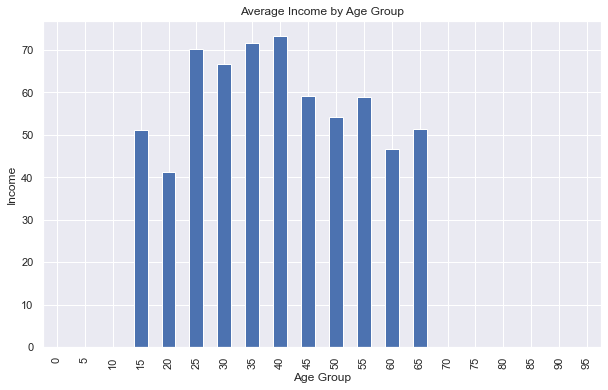

In [11]:
# To find the relation between age and income
# Grouping the data by age and calculating the average income for each age group
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=range(0, 101, 5), labels=range(0, 100, 5))
age_income_avg = dataset.groupby('Age_Group')['Income'].mean()

# Creating a bar plot to visualize the relationship between age and income
age_income_avg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.title('Average Income by Age Group')
plt.show()

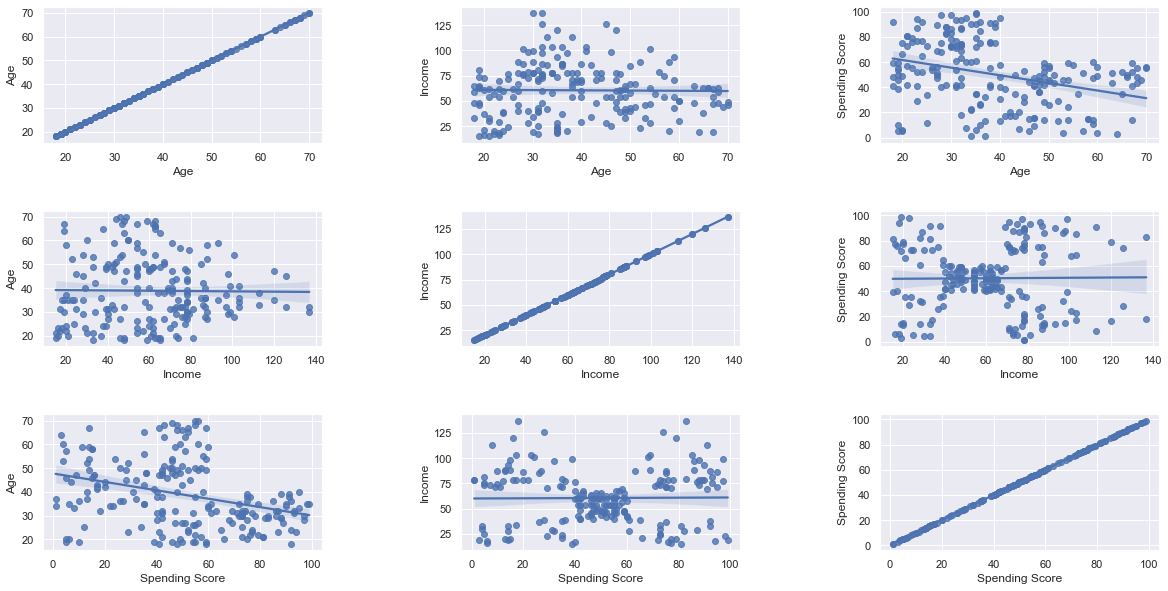

In [12]:
# Ploting the Relation between Age , Annual Income and Spending Score

plt.figure(1 , figsize = (20 , 10))
n = 0 
for x in ['Age' , 'Income' , 'Spending Score']:
    for y in ['Age' , 'Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

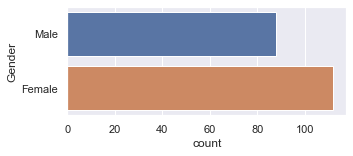

In [13]:
# Count Plot of Gender

plt.figure(1 , figsize = (5 , 2))
sns.countplot(y = 'Gender' , data = dataset)
plt.show()


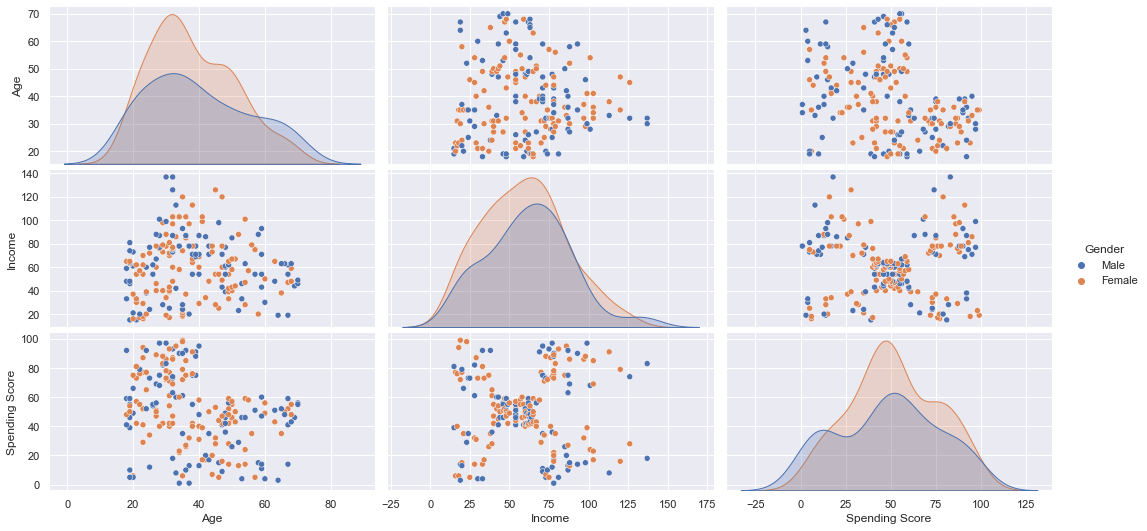

In [14]:
# Let's see our data in a detailed way with pairplot

sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.show()


In [16]:
# From the above plot we see that gender has no direct relation to segmenting customers.
#That's why we can drop it and move on with other features,we will call it X parameter from now on.
X = dataset.drop(['CustomerID', 'Gender'], axis=1)

## Clustering using K- means

In [17]:
from sklearn.cluster import KMeans

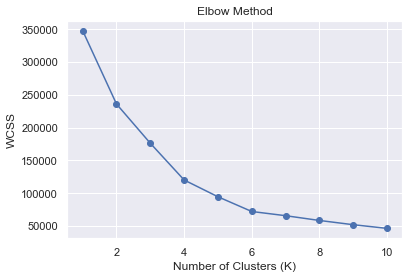

In [18]:
# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []
# Define the range of number of clusters to try
k_values = range(1, 11)

# Perform K-means clustering for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

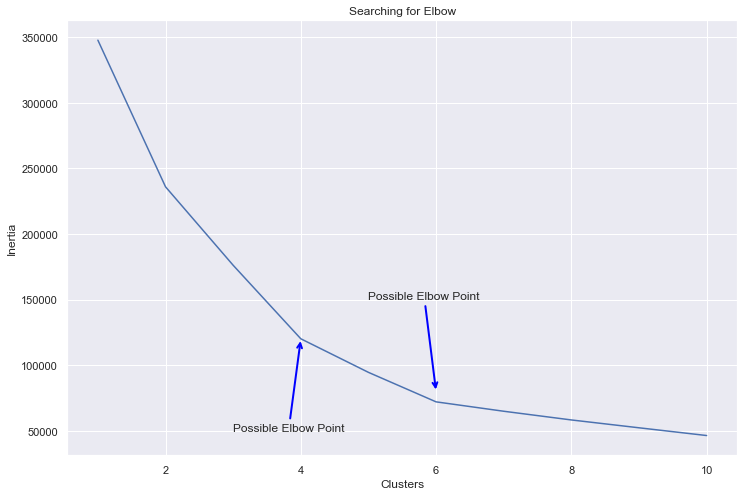

In [24]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 120000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(6, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()